# Pandas Homework with IMDB Data

Work with the [IMBD data](https://raw.githubusercontent.com/ga-students/ds-dc-23/master/2_dataset/imdb_1000.csv?token=ANUte-is8-dJ4XeomBvRCR8TulLjD9pdks5aAPGBwA%3D%3D) inside our repository.

## BASIC LEVEL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
movies = pd.read_csv('../2_dataset/imdb_1000.csv')

In [4]:
# check the number of rows and columns
movies.shape

(979, 6)

In [5]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
# calculate the average movie duration
movies.duration.mean()

120.97957099080695

In [7]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values(by='duration').head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [8]:
movies.sort_values(by='duration').tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


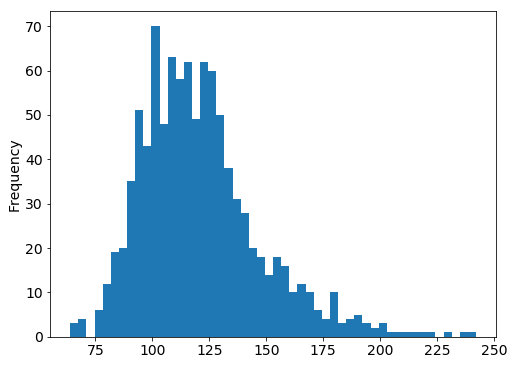

In [9]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot(kind='hist', bins=50)

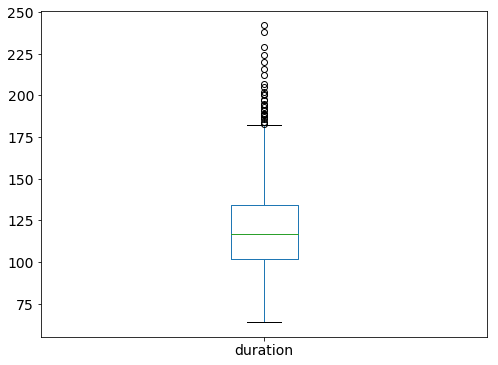

In [10]:
# use a box plot to display that same data
movies.duration.plot(kind='box')

## INTERMEDIATE LEVEL

In [11]:
# count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

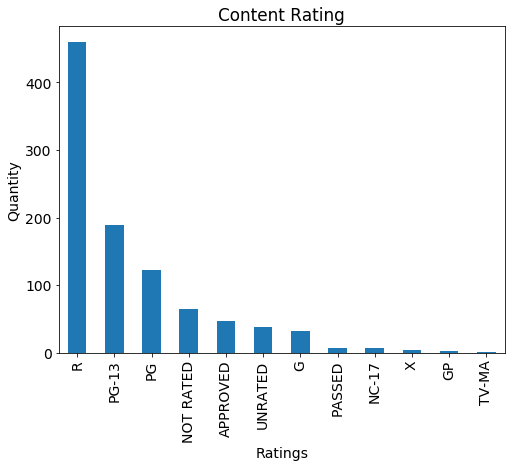

In [12]:
# use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind='bar', title='Content Rating')
plt.xlabel('Ratings')
plt.ylabel('Quantity')

In [13]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'], ['UNRATED','UNRATED','UNRATED','UNRATED'], inplace=True)

In [14]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(['X','TV-MA'], ['NC-17','NC-17'], inplace=True)

In [15]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [16]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [17]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies.content_rating.fillna(value='UNRATED', inplace=True)

In [18]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print 'Average Star Rating for movies 2 hours or longer is ' + str(movies[movies.duration >= 120].star_rating.mean())
print 'Average Star Rating for movies shorter than 2 hours is ' + str(movies[movies.duration < 120].star_rating.mean())

Average Star Rating for movies 2 hours or longer is 7.94889867841
Average Star Rating for movies shorter than 2 hours is 7.83866666667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AA58240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B04F6D8>]], dtype=object)

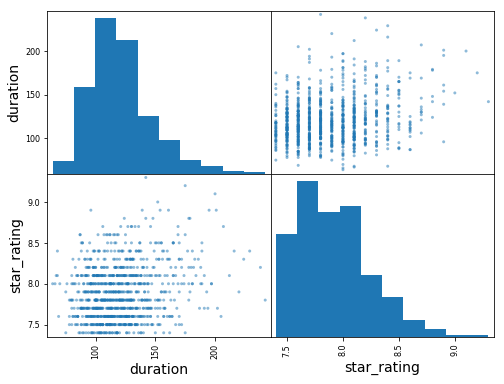

In [19]:
# use a visualization to detect whether there is a relationship between duration and star rating
pd.plotting.scatter_matrix(movies[['duration','star_rating']])

In [20]:
# calculate the average duration for each genre
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [21]:
# calculate the average duration for each genre
movies.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

## ADVANCED LEVEL

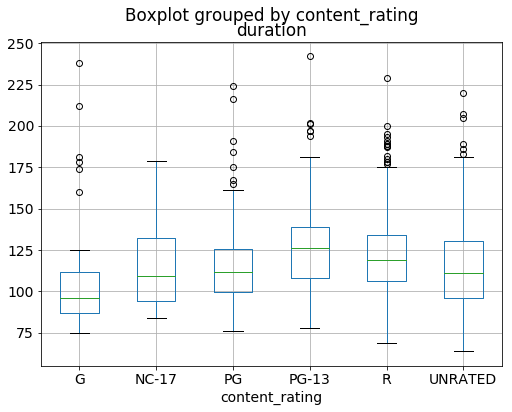

In [22]:
# visualize the relationship between content rating and duration
movies.boxplot(column='duration', by='content_rating')

In [23]:
# determine the top rated movie (by star rating) for each genre
# I believe that because star_rating is the first Series,
# no additional data manipulation is needed to ensure that .max() is called on star_rating. 
movies.groupby('genre').max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [24]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
print 'Unique titles = ' + str(pd.unique(movies.title).size)
print 'Total titles = ' + str(movies.title.size)
print 'Total movies = ' + str(movies.duplicated().size)

movies[movies.duplicated('title', keep=False)]

Unique titles = 975
Total titles = 979
Total movies = 979


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [25]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
# option 1: manually create a list of relevant genres, then filter using that list
# movies.genre.value_counts()
# ten_plus_list = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
# movies[movies.genre.isin(ten_plus_list)].groupby('genre').star_rating.mean()
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
# ten_plus_list = movies.genre.value_counts().index.values[movies.genre.value_counts() >=10]
# movies[movies.genre.isin(ten_plus_list)].groupby('genre').star_rating.mean()
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >=10]
# option 4: aggregate by count and mean, then filter using the count
# ten_plus = movies.groupby('genre').star_rating.agg(['count', 'mean'])
# ten_plus[ten_plus['count'] >= 10].drop('count',axis=1)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## BONUS

In [26]:
from ast import literal_eval

In [27]:
# Figure out something "interesting" using the actors data!
actor_list = []
for sub_list in movies.actors_list:
    for actor in literal_eval(sub_list):
        actor_list.append(actor)
print "There are " + str(pd.unique(actor_list).size) +" unique actors in the data set."

There are 1777 unique actors in the data set.
